# Gas Inflow Performance Analysis

> Victor C. Anisi | Technical Lead, Trainiton Analytics. 

This code is useful to quickly find out the parameters and model an IPR for a gas reservoir, with just a few test data points.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement: 
A gas well was tested using a three-point conventional deliverability
test. Data recorded during the test are given.

In [20]:
data = {'Pwf' : [1952,1700,1500,1300] , 
        'm(P)' : [316*10**6 , 245*10**6, 191*10**6, 141*10**6],
        'Qg(Mscf/d)' : [0, 2624.6, 4154.7 , 5425.1]}

In [21]:
df = pd.DataFrame(data)

In [22]:
df

,Pwf,m(P),Qg(Mscf/d)
0,1952,316000000,0.0
1,1700,245000000,2624.6
2,1500,191000000,4154.7
3,1300,141000000,5425.1


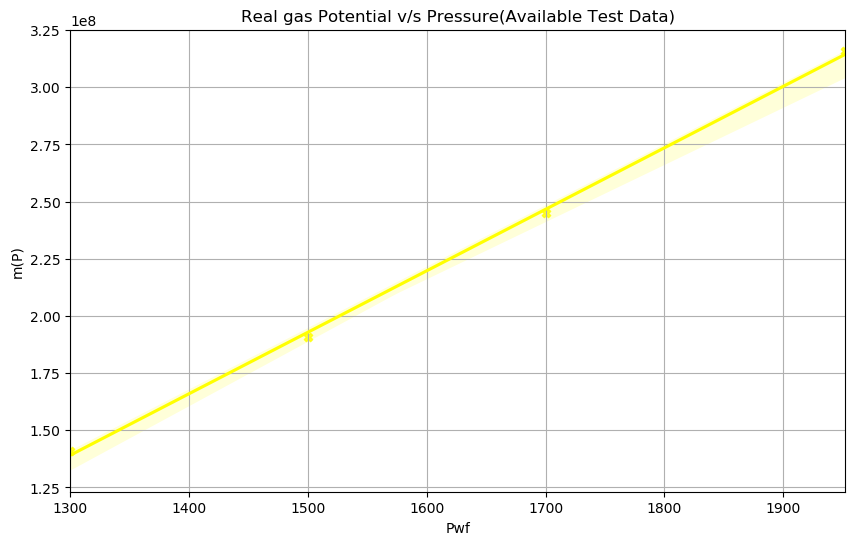

In [24]:
plt.figure(figsize=(10,6))

sns.regplot(x='Pwf' , y='m(P)' , data=df, marker='X', ci=95, color='yellow')

plt.title('Real gas Potential v/s Pressure(Available Test Data)')
plt.grid()

## Using the Back-Pressure Equation.

In [25]:
df['Pwf2'] = df['Pwf']**2

In [26]:
pr = 1952

df['Pr - Pwf2'] = pr**2 - df['Pwf']**2

In [27]:
df

,Pwf,m(P),Qg(Mscf/d),Pwf2,Pr - Pwf2
0,1952,316000000,0.0,3810304,0
1,1700,245000000,2624.6,2890000,920304
2,1500,191000000,4154.7,2250000,1560304
3,1300,141000000,5425.1,1690000,2120304


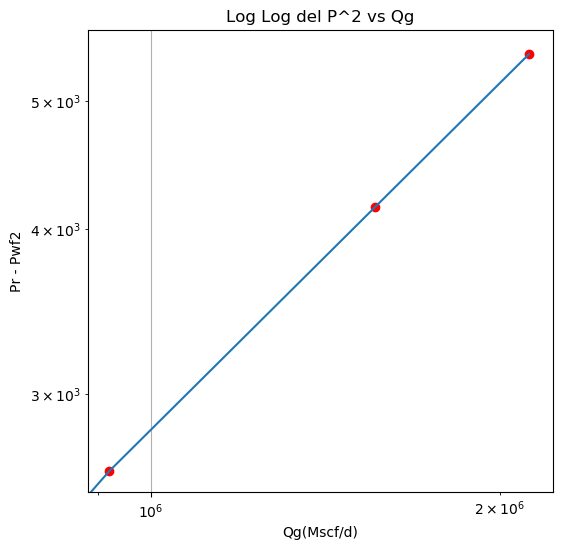

In [30]:
#Now plot (Pr2 - Pwf2) vs Qg on a Log Log scale

plt.figure(figsize=(6,6))
plt.loglog(df['Pr - Pwf2'] , df['Qg(Mscf/d)'])

plt.scatter(df['Pr - Pwf2'] , df['Qg(Mscf/d)'] , color='r')

plt.xlabel('Qg(Mscf/d)')
plt.ylabel('Pr - Pwf2')

plt.title('Log Log del P^2 vs Qg')

plt.grid()

## Let's Pause and have a look at the equations :-

>### $ Q_g = C(P_r^{2} - P_{wf}^{2})^{n}$

> ### $ log(Qg) = log(C) + n*log(P_r^{2} - P_{wf}^{2}) $


In [32]:
x = df['Pr - Pwf2'][1:]

1     920304
2    1560304
3    2120304
Name: Pr - Pwf2, dtype: int64

In [35]:
x = np.log(df['Pr - Pwf2'][1:])

y = np.log(df['Qg(Mscf/d)'][1:])


In [36]:
eqn = np.polyfit(x,y, deg=1)

In [37]:
eqn

array([ 0.86999855, -4.07453279])

In [38]:
#Analyzing the Results - 

n = eqn[0]

C = np.exp(eqn[1])

In [39]:
C

0.017000155494748568

## So we have successfully calculated the C & n.

### $ Q_g = 0.017*(P_r^{2} - P_{wf}^{2})^{0.87} $

## Now let's find out the AOF.

In [40]:
pwf = np.linspace(0,pr,25)

qg = C*((pr**2 - pwf**2)**n)

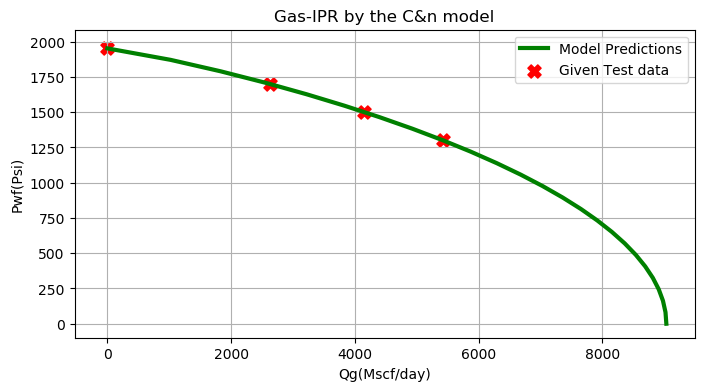

In [41]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(qg,pwf, color='green',lw=3, label='Model Predictions')

plt.scatter(df['Qg(Mscf/d)'], df['Pwf'], color='r', marker='X' , s=90, label='Given Test data')

plt.legend()
plt.xlabel('Qg(Mscf/day)')
plt.ylabel('Pwf(Psi)')

plt.title('Gas-IPR by the C&n model')

plt.grid()

### Now, Who can tell me the value of our AOF from the above results?